In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
#Reading the data for the past 13 years.
df = yf.download('AAPL','2005-01-01','2021-01-01',auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


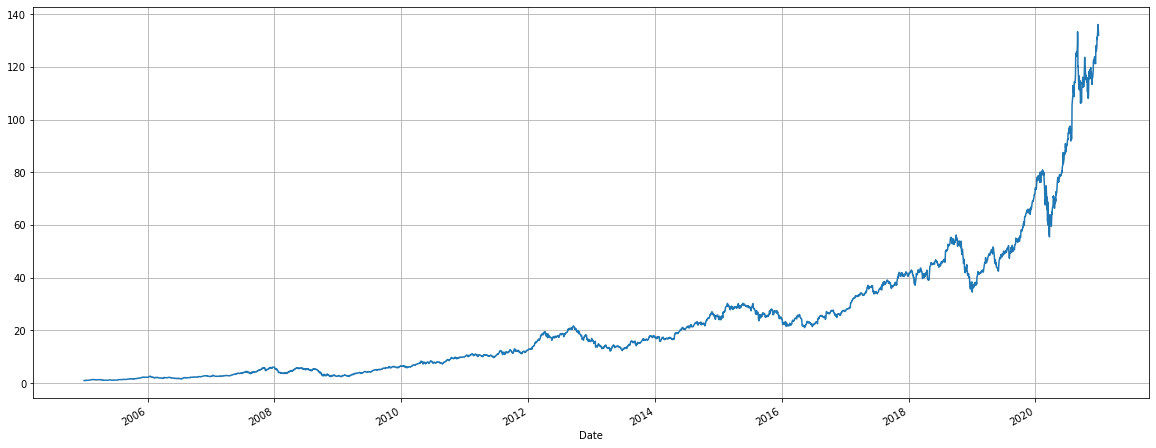

In [17]:
df['Close'].plot(grid=True,figsize=(20,8))
money=df['Close']

In [18]:
df['42d'] = np.round(money.rolling(42).mean()) 
df['252d'] = np.round(money.rolling(252).mean())

In [19]:


df[['Close', '42d', '252d']].tail()



,Close,42d,252d
Date,,,
2020-12-24,131.352829,120.0,94.0
2020-12-28,136.050766,120.0,94.0
2020-12-29,134.239273,121.0,94.0
2020-12-30,133.094650,121.0,94.0
2020-12-31,132.069473,122.0,95.0


<AxesSubplot:xlabel='Date'>

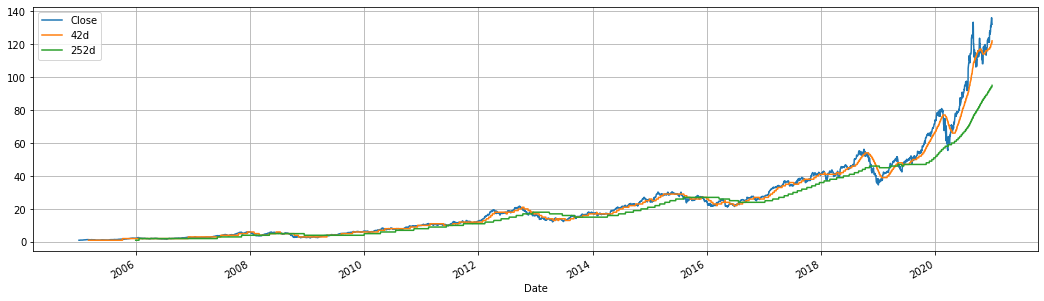

In [43]:
df[['Close', '42d', '252d']].plot(grid=True, figsize=(18, 5))

In [22]:


df['42-252'] = df['42d'] - df['252d'] 
df['42-252'].tail()



Date
2020-12-24    26.0
2020-12-28    26.0
2020-12-29    27.0
2020-12-30    27.0
2020-12-31    27.0
Name: 42-252, dtype: float64

In [24]:
df['42-252'].head(100)

Date
2004-12-31   NaN
2005-01-03   NaN
2005-01-04   NaN
2005-01-05   NaN
2005-01-06   NaN
              ..
2005-05-18   NaN
2005-05-19   NaN
2005-05-20   NaN
2005-05-23   NaN
2005-05-24   NaN
Name: 42-252, Length: 100, dtype: float64

In [25]:
df.head(100)

,Open,High,Low,Close,Volume,42d,252d,42-252
Date,,,,,,,,
2004-12-31,0.994922,0.996608,0.981736,0.987409,278588800,NaN,NaN,NaN
2005-01-03,0.993236,0.998296,0.959811,0.970391,691992000,NaN,NaN,NaN
2005-01-04,0.978056,1.003815,0.965484,0.980357,1096810400,NaN,NaN,NaN
2005-01-05,0.988328,1.000442,0.982042,0.988942,680433600,NaN,NaN,NaN
2005-01-06,0.991548,0.995228,0.971003,0.989709,705555200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2005-05-18,1.087069,1.151773,1.072964,1.099029,636722800,1.0,NaN,NaN
2005-05-19,1.097189,1.155452,1.097189,1.151466,793161600,1.0,NaN,NaN
2005-05-20,1.142267,1.154533,1.140427,1.151466,452650800,1.0,NaN,NaN


In [26]:
df.shape

(4029, 8)

In [27]:
data=df.dropna()

In [28]:
data.shape

(3778, 8)

In [29]:
data.head(100)

,Open,High,Low,Close,Volume,42d,252d,42-252
Date,,,,,,,,
2005-12-29,2.262454,2.263681,2.190085,2.191005,490025200,2.0,1.0,1.0
2005-12-30,2.174446,2.221057,2.156967,2.204498,624262800,2.0,1.0,1.0
2006-01-03,2.219523,2.292199,2.215537,2.292199,807234400,2.0,1.0,1.0
2006-01-04,2.303852,2.329917,2.284533,2.298946,619603600,2.0,1.0,1.0
2006-01-05,2.294652,2.296798,2.261534,2.280853,449422400,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2006-05-17,1.984323,2.014682,1.964697,2.001189,754194000,2.0,2.0,0.0
2006-05-18,2.014069,2.031855,1.935567,1.937407,658442400,2.0,2.0,0.0
2006-05-19,1.939860,1.989537,1.926367,1.978191,985866000,2.0,2.0,0.0


In [30]:
data.tail(100)

,Open,High,Low,Close,Volume,42d,252d,42-252
Date,,,,,,,,
2020-08-11,111.254435,111.763657,108.410225,108.676018,187902400,95.0,72.0,23.0
2020-08-12,109.791340,112.551094,109.592622,112.287788,165598000,96.0,72.0,24.0
2020-08-13,113.698714,115.300912,113.199423,114.275009,210082000,97.0,72.0,25.0
2020-08-14,114.096160,114.265072,112.322564,114.173164,165565200,97.0,72.0,25.0
2020-08-17,115.320780,115.345621,113.234202,113.875076,119561600,98.0,73.0,25.0
...,...,...,...,...,...,...,...,...
2020-12-24,130.705875,132.835866,130.486902,131.352829,54930100,120.0,94.0,26.0
2020-12-28,133.363396,136.697720,132.885629,136.050766,124486200,120.0,94.0,26.0
2020-12-29,137.404410,138.140939,133.711753,134.239273,121047300,121.0,94.0,27.0


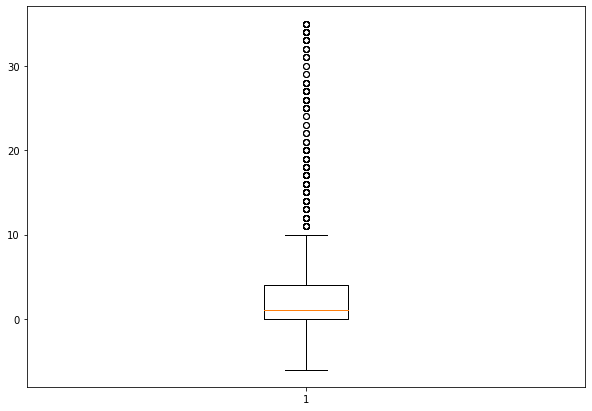

In [32]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data['42-252'])
 
# show plot
plt.show()

In [37]:
SD=1
data['Signal']=np.where(data['42-252'] > SD, 1, 0) 
data['Signal']=np.where(data['42-252'] < SD, -1, data['Signal']) 
data['Signal'].value_counts()

 1    1822
-1    1195
 0     761
Name: Signal, dtype: int64

<AxesSubplot:xlabel='Date'>

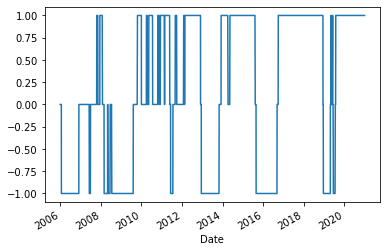

In [39]:
data['Signal'].plot(lw=1.5)

In [40]:
data['Market'] = np.log(data['Close'] / data['Close'].shift(1))

In [41]:
data['Strategy'] = data['Signal'].shift(1) * data['Market']

<AxesSubplot:xlabel='Date'>

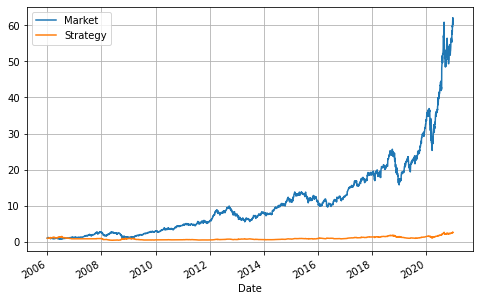

In [42]:
data[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))

In [44]:
data.head(20)


,Open,High,Low,Close,Volume,42d,252d,42-252,Signal,Market,Strategy
Date,,,,,,,,,,,
2005-12-29,2.262454,2.263681,2.190085,2.191005,490025200,2.0,1.0,1.0,0,NaN,NaN
2005-12-30,2.174446,2.221057,2.156967,2.204498,624262800,2.0,1.0,1.0,0,0.006139,0.000000
2006-01-03,2.219523,2.292199,2.215537,2.292199,807234400,2.0,1.0,1.0,0,0.039012,0.000000
2006-01-04,2.303852,2.329917,2.284533,2.298946,619603600,2.0,1.0,1.0,0,0.002939,0.000000
2006-01-05,2.294652,2.296798,2.261534,2.280853,449422400,2.0,1.0,1.0,0,-0.007901,-0.000000
2006-01-06,2.307532,2.351996,2.286066,2.339730,704457600,2.0,1.0,1.0,0,0.025486,0.000000
2006-01-09,2.352915,2.367328,2.322557,2.332063,675040800,2.0,1.0,1.0,0,-0.003282,-0.000000
2006-01-10,2.338196,2.511146,2.325317,2.479561,2279869200,2.0,1.0,1.0,0,0.061328,0.000000
2006-01-11,2.570944,2.600381,2.532612,2.572784,1493794400,2.0,1.0,1.0,0,0.036907,0.000000


In [45]:
data['Verbal Signal']=np.where(data['Signal'] ==1, 'Buy', np.where(data['Signal'] ==-1, 'Sell','Hold')) 

In [47]:
data.head(20)

,Open,High,Low,Close,Volume,42d,252d,42-252,Signal,Market,Strategy,Verbal Signal
Date,,,,,,,,,,,,
2005-12-29,2.262454,2.263681,2.190085,2.191005,490025200,2.0,1.0,1.0,0,NaN,NaN,Hold
2005-12-30,2.174446,2.221057,2.156967,2.204498,624262800,2.0,1.0,1.0,0,0.006139,0.000000,Hold
2006-01-03,2.219523,2.292199,2.215537,2.292199,807234400,2.0,1.0,1.0,0,0.039012,0.000000,Hold
2006-01-04,2.303852,2.329917,2.284533,2.298946,619603600,2.0,1.0,1.0,0,0.002939,0.000000,Hold
2006-01-05,2.294652,2.296798,2.261534,2.280853,449422400,2.0,1.0,1.0,0,-0.007901,-0.000000,Hold
2006-01-06,2.307532,2.351996,2.286066,2.339730,704457600,2.0,1.0,1.0,0,0.025486,0.000000,Hold
2006-01-09,2.352915,2.367328,2.322557,2.332063,675040800,2.0,1.0,1.0,0,-0.003282,-0.000000,Hold
2006-01-10,2.338196,2.511146,2.325317,2.479561,2279869200,2.0,1.0,1.0,0,0.061328,0.000000,Hold
2006-01-11,2.570944,2.600381,2.532612,2.572784,1493794400,2.0,1.0,1.0,0,0.036907,0.000000,Hold


In [48]:
data.tail(20)

,Open,High,Low,Close,Volume,42d,252d,42-252,Signal,Market,Strategy,Verbal Signal
Date,,,,,,,,,,,,
2020-12-03,122.942356,123.201142,121.638485,122.365074,78967600,116.0,90.0,26.0,1,-0.001138,-0.001138,Buy
2020-12-04,122.026661,122.285447,120.951709,121.678299,78260400,117.0,91.0,26.0,1,-0.005628,-0.005628,Buy
2020-12-07,121.738019,123.987453,121.678302,123.171288,86712000,117.0,91.0,26.0,1,0.012195,0.012195,Buy
2020-12-08,123.788392,124.395540,122.514372,123.798340,82225500,117.0,91.0,26.0,1,0.005078,0.005078,Buy
2020-12-09,123.947635,125.360992,120.434144,121.210495,115089200,117.0,91.0,26.0,1,-0.021125,-0.021125,Buy
2020-12-10,119.936482,123.290724,119.588120,122.663666,81312200,117.0,91.0,26.0,1,0.011918,0.011918,Buy
2020-12-11,121.857458,122.185917,119.986253,121.837555,86939800,117.0,92.0,25.0,1,-0.006758,-0.006758,Buy
2020-12-14,122.026660,122.773153,120.971619,121.210495,79184500,117.0,92.0,25.0,1,-0.005160,-0.005160,Buy
2020-12-15,123.758521,127.301878,123.549504,127.281967,157243700,117.0,92.0,25.0,1,0.048876,0.048876,Buy
